In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
raw_data = pd.read_csv('./Advertising.csv')

In [26]:
raw_data.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [27]:
raw_data = raw_data.drop(columns=['ID'])

In [28]:
raw_data.shape

(200, 4)

In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [30]:
raw_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Data Preprocessing

In [32]:
# Missing values

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [33]:
# Duplicated values

data.duplicated().any()

False

In [34]:
# finding Outliers

def outliers_zscore(data):
    data = sorted(data)

    mean = np.mean(data)

    std  = np.std(data)

    outliers = []
    for i, value in enumerate(data):
        zscore = (value - mean)/std
        if zscore > 3:
            outliers.append(i)
    return outliers

In [35]:
# finding outliers in every column #15mins

for column in data.columns:
    index = list(outliers_zscore(data[column]))
    data = data.drop(index)

data


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7


## Exploratory Data Analysis

<AxesSubplot: >

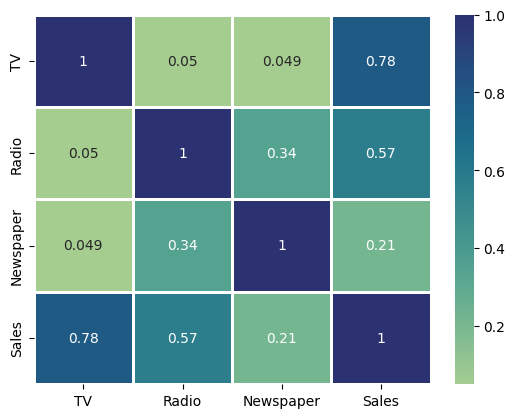

In [36]:
# Using heatmap to find correlation

sns.heatmap(
    data.corr(), 
    annot=True, 
    cmap='crest', 
    linewidth=True
)

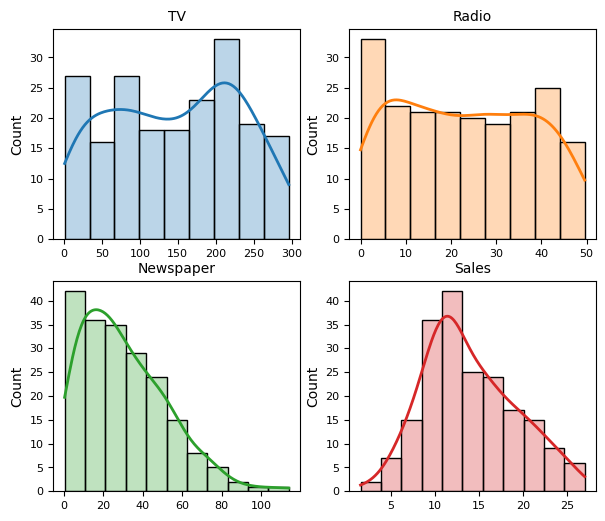

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,6))
axes = axes.flat
for index, column in enumerate(data):
    sns.histplot(
        data = data,
        x    = column,
        stat = 'count',
        kde  = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[index]
)
    axes[index].set_title(column, fontsize = 10)
    axes[index].tick_params(labelsize = 8)
    axes[index].set_xlabel('')

Text(0.5, 0.98, 'Visualizing continuous columns')

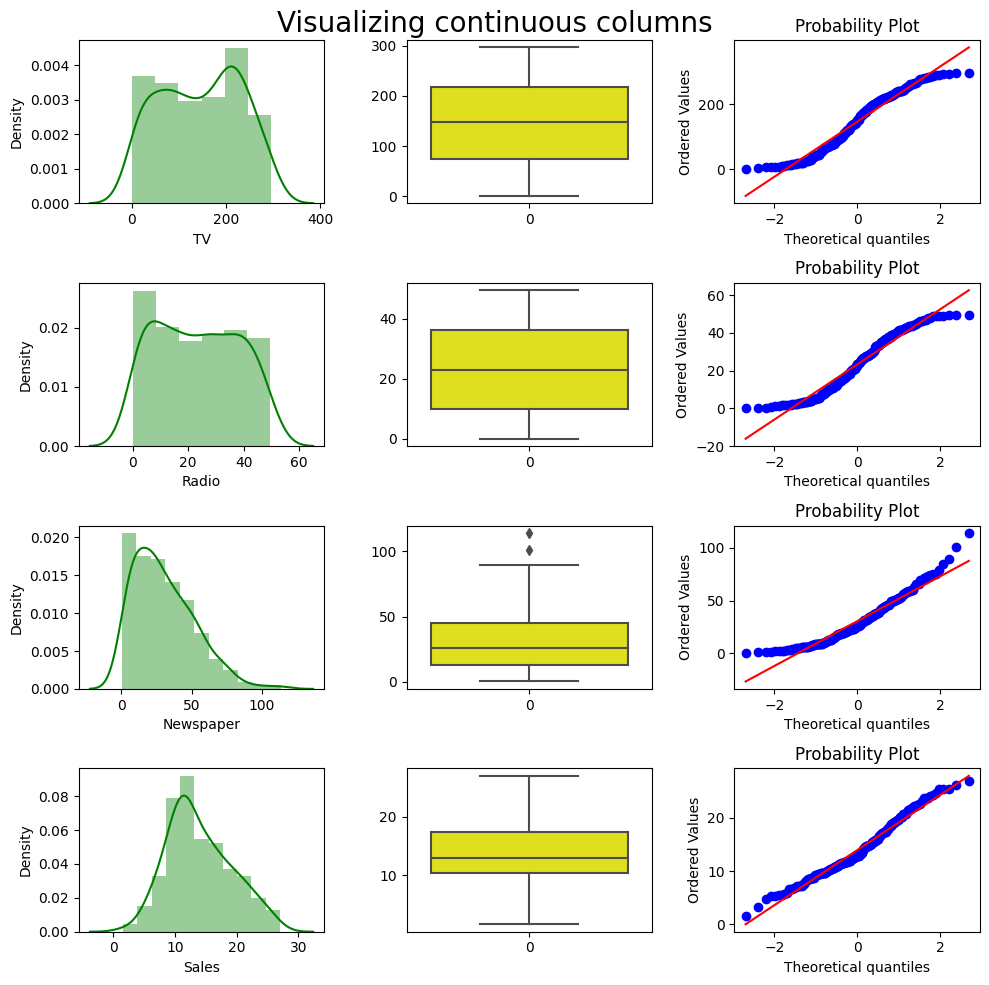

In [48]:
fig,ax = plt.subplots(4,3,figsize=(10,10))
for index,i in enumerate(data.columns):
    sns.distplot(data[i],ax=ax[index,0],color='green');
    sns.boxplot(data[i],ax=ax[index,1],color='yellow');
    stats.probplot(data[i],plot=ax[index,2]);
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns",fontsize=20)

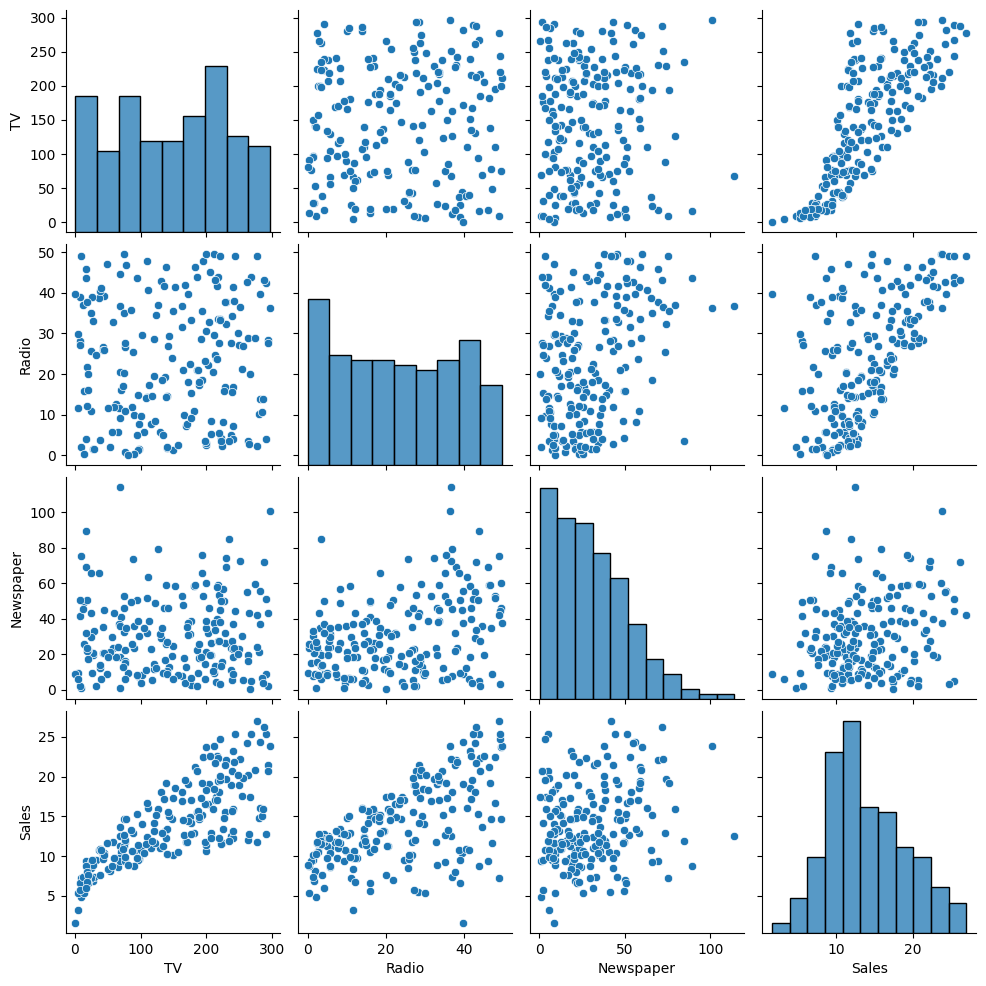

In [39]:
sns.pairplot(data)
plt.show()